# Review of Basic Python for Data Science

## Basic Data Types


- **integers** (`int`): Whole numbers, positive or negative or zero

  - e.g. `3`,&nbsp;&nbsp;`0`,&nbsp;&nbsp;`-531`


- **floats** (`float`): Decimal numbers

  - e.g. `3.14`,&nbsp;&nbsp;`0.0004`,&nbsp;&nbsp;`-878.482`


- **strings** (`str`): Arbitrary text

  - e.g. `"hello"`,&nbsp;&nbsp;`'my name is ethan'`,&nbsp;&nbsp;`""`


- **booleans** (`bool`): Logical values `True` and `False`

  - `True`,&nbsp;&nbsp;`False` -- that's it

## Container Types

- Python also has some objects that can "contain" others...

## Container Types

**lists** (`list`): Ordered, 1-dimensional sequences of objects

  - Elements may be different types of things.

**dictionaries** (`dict`): Mappings from "keys" to "values", good for looking up entries by their key

## Pandas

- The Pandas package is the backbone of data analysis in Python

- Pandas is all about **DataFrames**, objects that store tabular data

  - The package was originally developed by financial analysts who wanted to do data analysis in Python, but needed an abstraction similar to DataFrames from the R language to do so.


- The funny name is short for **Pan**el **Da**ta

## DataFrames -- Importing Data

- Easy to read in data from common formats (CSV, JSON, SQL databases)

- `pd.read_csv` is what we'll use most often

```python
df = pd.read_csv('data/my_data.csv')
```

In [7]:
import pandas as pd
planes_df = pd.read_csv('../data/planes.csv')

## DataFrames -- Preview Data

`df.head()` is usually the place to start -- returns the first 5 rows

In [8]:
planes_df.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


## DataFrames -- Exporting Data

- Pandas can save data in most of the formats it supports importing from.

- Here we usually use `df.to_csv`

```python
df.to_csv('data/my_data.csv', index=False)
```

## Subsetting Data

- Before you do much else, you need to be able to get at pieces of a DataFrame that you're interested in.

- This usually means limiting to certain columns, to certain rows, or both at the same time.

## Selecting

- Subsetting data by its columns is often called **selecting**

  - You might say "select the name column from the data"

- The syntax to select a single column is `df[column_name]`

  - This returns a **series** object, a 1-dimensional Pandas object

  - Series are a lot like Python lists, except all the data in them is usually of the same type

## Selecting

- Using single brackets returns a Series; using double brackets returns a **DataFrame**
    - Selecting multiple columns must be done with double brackets
  
  - You can even use double brackets with a single column if you don't want a Series

In [9]:
planes_df['seats']

0        55
1       182
2       182
3       182
4        55
       ... 
3317    100
3318    142
3319    100
3320    142
3321    142
Name: seats, Length: 3322, dtype: int64

In [10]:
planes_df[['seats', 'tailnum']]

,seats,tailnum
0,55,N10156
1,182,N102UW
2,182,N103US
3,182,N104UW
4,55,N10575
...,...,...
3317,100,N997AT
3318,142,N997DL
3319,100,N998AT
3320,142,N998DL


## Indexing

- "Indexing" is the word we use for subsetting rows based on their location or row label.

- Most things in Python index from 0.

  - That means an sequence with 3 elements would label them #0, #1, and #2.
  

- DataFrames have row indexes, as we've discussed before.

  - You can think of them as row labels.

  - By default, they're just integers from 0 to (number_of_rows - 1).

## Indexing

- Indices can be selected using `df.loc` and brackets.

In [11]:
planes_df.loc[2]

tailnum                          N103US
year                             1999.0
type            Fixed wing multi engine
manufacturer           AIRBUS INDUSTRIE
model                          A320-214
engines                               2
seats                               182
speed                               NaN
engine                        Turbo-fan
Name: 2, dtype: object

- Like selecting a single column, indexing a single row returns a **Series**, not a DataFrame.

  - Because, again, it's a 1-dimensional object.

But using a *slice* for an index returns a DataFrame...

In [12]:
planes_df.loc[3:6]

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
5,N105UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
6,N107US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan


## Combining Selecting and Indexing

- You can select columns and index rows all at once using `df.loc[row_index, columns]`

In [13]:
# Row indices 3-6, columns "seats" and "tailnum"
planes_df.loc[3:6, ['seats', 'tailnum']]

,seats,tailnum
3,182,N104UW
4,55,N10575
5,182,N105UW
6,182,N107US


## Filtering

- *Filtering* means limiting rows based on a condition of the data

  - e.g. "all rows where the number of engines is greater than 2"
  

- This is also done with `df.loc`, but you pass in an expression describing which rows to keep.

In [14]:
# This syntax is a little clunky; the DataFrame name is specified twice.
planes_df.loc[planes_df['engines'] > 2]

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
603,N281AT,NaN,Fixed wing multi engine,AIRBUS INDUSTRIE,A340-313,4,375,NaN,Turbo-jet
1037,N381AA,1956.0,Fixed wing multi engine,DOUGLAS,DC-7BF,4,102,232.0,Reciprocating
2109,N670US,1990.0,Fixed wing multi engine,BOEING,747-451,4,450,NaN,Turbo-jet
2706,N840MQ,1974.0,Fixed wing multi engine,CANADAIR LTD,CF-5D,4,2,NaN,Turbo-jet
2764,N854NW,2004.0,Fixed wing multi engine,AIRBUS,A330-223,3,379,NaN,Turbo-fan
2771,N856NW,2004.0,Fixed wing multi engine,AIRBUS,A330-223,3,379,NaN,Turbo-fan
2931,N905FJ,1986.0,Fixed wing multi engine,AVIONS MARCEL DASSAULT,MYSTERE FALCON 900,3,12,NaN,Turbo-fan


## Combining Selecting and Filtering

- Like indexing, filtering can be combined with selecting in the `.loc` brackets.

  - `df.loc[row_filter, columns]`

In [15]:
planes_df.loc[planes_df['seats'] == 139, ['seats', 'tailnum']]

,seats,tailnum
1813,139,N600TR
2131,139,N675MC
2402,139,N762NC
2432,139,N767NC
2472,139,N774NC
2483,139,N777NC
2492,139,N779NC
2503,139,N782NC


- Generally:

  - Columns: `df[columns]`

  - Rows: `df.loc[rows]`

  - Both: `df.loc[rows, columns]`


## DataFrame-level Summaries

- You can get quick summaries of all numeric columns in a DataFrame using `df.describe()`

In [16]:
planes_df.describe()

,year,engines,seats,speed
count,3252.000000,3322.000000,3322.000000,23.000000
mean,2000.484010,1.995184,154.316376,236.782609
std,7.193425,0.117593,73.654974,149.759794
min,1956.000000,1.000000,2.000000,90.000000
25%,1997.000000,2.000000,140.000000,107.500000
50%,2001.000000,2.000000,149.000000,162.000000
75%,2005.000000,2.000000,182.000000,432.000000
max,2013.000000,4.000000,450.000000,432.000000


## Column-level Summaries

- Series (remember, individual columns are Series objects) offer lots of summary options.

- Usually they're invoked as `df[column].SUMMARY()` and return a single, scalar value.

## Column-level Numeric Summaries

- `df[column].mean()`

- `df[column].max()`

- `df[column].min()`

- `df[column].quantile(q=0.5) # Median`

In [17]:
planes_df['year'].min()

1956.0

## Column-level Categorical Summaries

- `df[column].nunique() # Number of unique values`

- `df[column].value_counts() # Number of occurrences of each value, descending`

In [18]:
planes_df['engine'].nunique()

6

In [19]:
planes_df['type'].value_counts()

Fixed wing multi engine     3292
Fixed wing single engine      25
Rotorcraft                     5
Name: type, dtype: int64

- Note that `value_counts` is an exception to the rule -- it doesn't return a single number, but instead a *Series*.

## Some Other Things

**f-strings** let you interpolate, or dynamically insert, strings in other strings

In [20]:
instr1 = 'Brad'
instr2 = 'Ethan'
n_days = 4
my_str = f'{instr1} and {instr2} teach a {n_days}-day Python workshop.'

In [21]:
print(my_str)

Brad and Ethan teach a 4-day Python workshop.


You can easily make histograms and scatterplots with DataFrames.

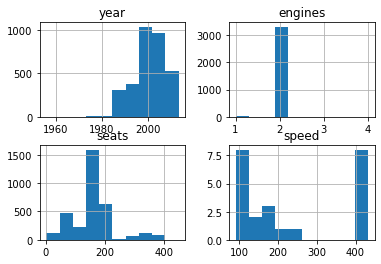

In [30]:
planes_df.hist();

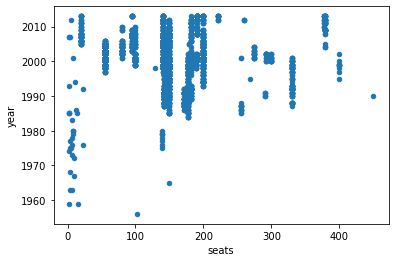

In [34]:
planes_df.plot.scatter('seats', 'year');

**Functions** are reusable code blocks that can be "called" from other code. They typically *return* a value, which the calling code can use.

In [35]:
def compute_triangle_area(base, height):
    return base * height / 2

In [37]:
my_triangle_base = 3
my_triangle_height = 4
print(compute_triangle_area(my_triangle_base, my_triangle_height))

6.0


We use **Conda** to manage environments in Python.
- It lets us manage the interdependencies of various packages on our computer
- We usually use a separate environment for each big Python project that we do.

## Questions